In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
path = '/home/octo/Desktop/QTPY/data/min/'
#path = '/home/octo/Desktop/QTPY/data/sec/'


In [8]:
import TA# self made python file at PyCON16 folder for TA
#https://mrjbq7.github.io/ta-lib/func.html
import talib

In [9]:
data1='QQQ.csv'
data2='SPY.csv'

In [12]:
SPY=pd.read_csv(path + 'SPY.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)
QQQ=pd.read_csv(path + 'QQQ.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)

1.ROC average of 5 15 25, changes 4% up from bottom then sell and buy when line 4% below up. so 4% up-down band of ROC
2. 


In [13]:
SPY['ROC_5'] = talib.ROC(np.asarray(SPY['close']), timeperiod=5)# good distribution of return -1 to +1 
SPY['ROC_15'] = talib.ROC(np.asarray(SPY['close']), timeperiod=15)## good distribution of return -1 to +1 
SPY['ROC_25'] = talib.ROC(np.asarray(SPY['close']), timeperiod=25)## good distribution of return -1 to +1 
SPY['ROC'] = (SPY['ROC_5']+SPY['ROC_15']+SPY['ROC_25'])%3

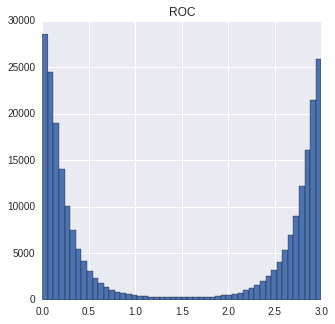

In [14]:
pd.DataFrame.hist(SPY[['ROC']],bins=50,figsize = [5,5]);

In [23]:
SPY['RSI'] = np.where(talib.RSI(np.asarray(SPY['close']), timeperiod=15)>75,1,np.where(talib.RSI(np.asarray(SPY['close']), timeperiod=15)<25,-1,0))

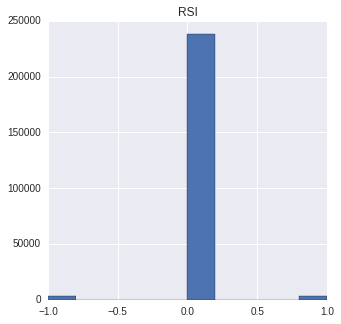

In [24]:
pd.DataFrame.hist(SPY[['RSI']],bins=10,figsize = [5,5]);

In [29]:
SPY['ADX']=np.where(talib.ADX(np.asarray(SPY['close']),np.asarray(SPY['low']),np.asarray(SPY['high']),timeperiod=15)>45,1,0)

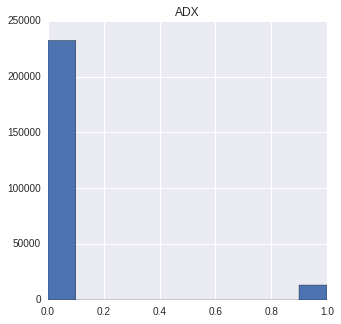

In [30]:
pd.DataFrame.hist(SPY[['ADX']],bins=10,figsize = [5,5]);

In [136]:
#pd.DataFrame.hist(SPY[['Change']],bins=5,figsize = [5,5]);

In [135]:
#plt.plot(SPY['Change'])

In [139]:
#SPY['jUjD']=np.where(np.logical_and(SPY['jump'].shift(1)==1,SPY['Change']>0),1,np.where(np.logical_and(SPY['jump'].shift(1)==-1,SPY['Change']<0),-1,0))

In [140]:
#SPY.info()

In [145]:
#plt.plot(SPY['Change'].cumsum())

In [144]:
#pd.DataFrame.hist(SPY[['jUjD']],bins=5,figsize = [5,5]);

In [147]:
#SPY['volume_mean'].plot(figsize = [15,15])

In [155]:
#SPY['jUjD']=np.where(np.logical_and(SPY['jV'].shift(1)==1,SPY['Change']>0),1,np.where(np.logical_and(SPY['jV'].shift(1)==-1,SPY['Change']<0),-1,0))

In [154]:
#pd.DataFrame.hist(SPY[['jUjD']],bins=5,figsize = [5,5]);

In [38]:
def np_vwap():
    return np.cumsum(SPY['volume']*(SPY['high']+SPY['low']+SPY['close'])/3) / np.cumsum(SPY['volume'])

In [39]:
SPY['VWAP']=np_vwap()

str: if open/vwap > 1.001 then short and < 0.999 then buy.

str:wap3 > vwap9*1.025 stop loss holding price*0.9

Buy  =Cover=Ref(L,-1)>Ref(VWAP,-1)AND H>Ref(H,-1);
Short=Sell=Ref(VWAP,-1)>Ref(H,-1)AND L


In [40]:
SPY.head()

,high,low,open,close,total_volume,volume,ROC_5,ROC_15,ROC_25,ROC,RSI,ADX,VWAP
2014-01-02 09:31:00,183.990,183.81,183.9800,183.890,4405796,942962,NaN,NaN,NaN,NaN,0,0,183.896667
2014-01-02 09:32:00,183.925,183.85,183.8900,183.895,5138040,722290,NaN,NaN,NaN,NaN,0,0,183.893775
2014-01-02 09:33:00,183.980,183.89,183.8901,183.960,5900903,753587,NaN,NaN,NaN,NaN,0,0,183.909215
2014-01-02 09:34:00,184.070,183.95,183.9600,183.970,6638010,722365,NaN,NaN,NaN,NaN,0,0,183.929326
2014-01-02 09:35:00,183.980,183.88,183.9700,183.880,6914733,271235,NaN,NaN,NaN,NaN,0,0,183.928055


##### Total change after 5 min or 50 bars [O-Ref(C,-50)]

In [667]:
SPY['return']= np.where(SPY['open']>SPY['close'].shift(1),1,np.where(SPY['open']<SPY['close'].shift(1),-1,0))
SPY['volume_ch']=SPY['volume']/SPY['volume'].shift(1)
SPY['4Ch'] = SPY['open']-SPY['close'].shift(4)
SPY['4VCh'] = SPY['volume']/SPY['volume'].shift(4)
SPY['19Ch'] = SPY['open']-SPY['close'].shift(19)
SPY['19VCh'] = SPY['volume']/SPY['volume'].shift(19)

In [666]:
##volume above 1 to get trend 
SPY['4J']=np.where(SPY['4Ch']>0.05,1,np.where(SPY['4Ch']<-0.05,-1,0))
SPY['4jHV']=np.where(np.logical_and(SPY['4J']==1,SPY['4VCh']>1.2),1,np.where(np.logical_and(SPY['4J']==-1,SPY['4VCh']>1.2),-1,0))

In [672]:
##volume below 1 to get trend 
SPY['4J']=np.where(SPY['4Ch']>0.07,1,np.where(SPY['4Ch']<-0.07,-1,0))
SPY['4jLV']=np.where(np.logical_and(SPY['4J']==1,SPY['4VCh']<0.70),1,np.where(np.logical_and(SPY['4J']==-1,SPY['4VCh']<0.70),-1,0))

In [670]:
##volume above 1 show tr possible
SPY['19J']=np.where(SPY['19Ch']>0.2,1,np.where(SPY['19Ch']<-0.2,-1,0))

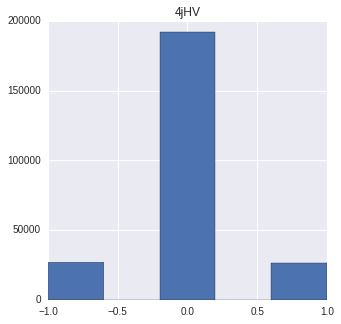

In [665]:
pd.DataFrame.hist(SPY[['4jHV']],bins=5,figsize = [5,5]);

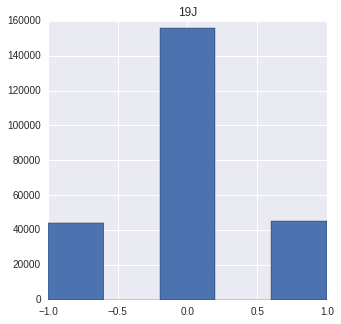

In [671]:
pd.DataFrame.hist(SPY[['19J']],bins=5,figsize = [5,5]);

ROC,ADX with change 0.001% or 0.2, these have 16% frequency each

In [677]:
#after 4 bars
SPY['4jHV_adx']=np.where(np.logical_and(SPY['4jHV']==1,SPY['ADX']==1),1,np.where(np.logical_and(SPY['4jHV']==-1,SPY['ADX']==1),-1,0))

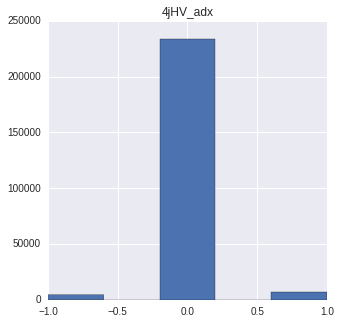

In [678]:
pd.DataFrame.hist(SPY[['4jHV_adx']],bins=5,figsize = [5,5]);

In [681]:
#after 4 bars
SPY['4jHV_roc4']=np.where(np.logical_and(SPY['4jHV']==1,SPY['ROC_4']==1),1,np.where(np.logical_and(SPY['4jHV']==-1,SPY['ROC_4']==-1),-1,0))

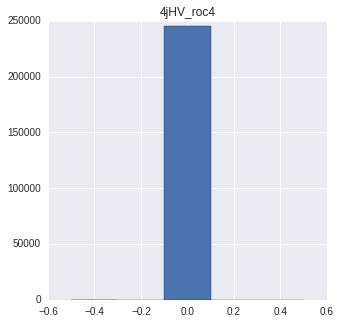

In [682]:
pd.DataFrame.hist(SPY[['4jHV_roc4']],bins=5,figsize = [5,5]);

In [685]:
#after 4 bars
SPY['4jHV_roc']=np.where(np.logical_and(SPY['4jHV'].shift(15)==1,SPY['ROC']==1),1,np.where(np.logical_and(SPY['4jHV'].shift(15)==-1,SPY['ROC']==-1),-1,0))

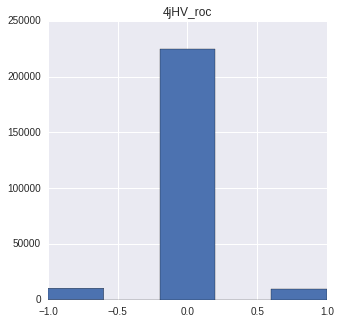

In [686]:
pd.DataFrame.hist(SPY[['4jHV_roc']],bins=5,figsize = [5,5]);

In [687]:
#after 4 bars
SPY['19J_roc']=np.where(np.logical_and(SPY['19J']==1,SPY['ROC']==1),1,np.where(np.logical_and(SPY['19J']==-1,SPY['ROC']==-1),-1,0))

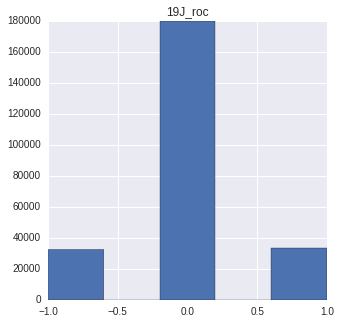

In [688]:
pd.DataFrame.hist(SPY[['19J_roc']],bins=5,figsize = [5,5]);

In [468]:
SPY['trend']=np.where(np.logical_and(SPY['12jHV']==1,SPY['ADX']==1),1,np.where(np.logical_and(SPY['12jHV']==-1,SPY['momentum']==-1),-1,0))

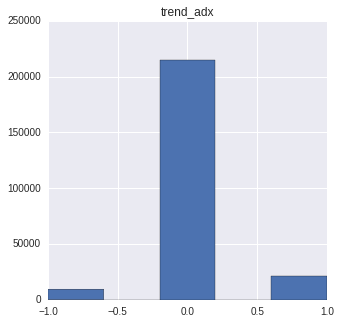

In [469]:
pd.DataFrame.hist(SPY[['trend_adx']],bins=5,figsize = [5,5]);

In [507]:
##volume above 1 show tr possible
SPY['120J']=np.where(SPY['120Ch']>0.35,1,np.where(SPY['120Ch']<-0.3,-1,0))

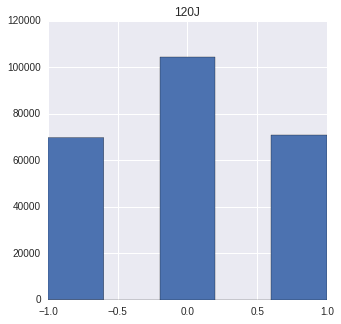

In [508]:
pd.DataFrame.hist(SPY[['120J']],bins=5,figsize = [5,5]);

In [509]:
SPY['1250jT']=np.where(np.logical_and(SPY['trend_cmo'].shift(38)==1,SPY['120J']==1),1,np.where(np.logical_and(SPY['trend_cmo'].shift(38)==-1,SPY['120J']==1),-1,0))

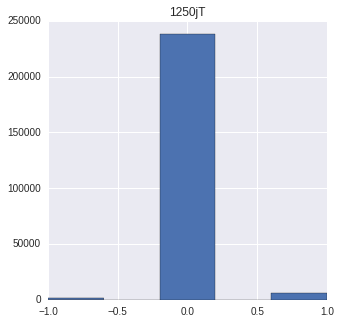

In [510]:
pd.DataFrame.hist(SPY[['1250jT']],bins=5,figsize = [5,5]);

In [494]:
SPY['1250jT']=np.where(np.logical_and(SPY['trend_adx'].shift(38)==1,SPY['50J']==1),1,np.where(np.logical_and(SPY['trend_adx'].shift(38)==-1,SPY['50J']==1),-1,0))

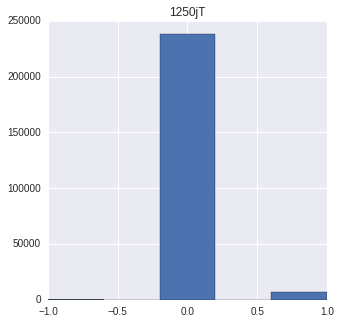

In [495]:
pd.DataFrame.hist(SPY[['1250jT']],bins=5,figsize = [5,5]);